In [1]:
import dill
dill.load_session('ref_reports.db')

In [2]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [176]:
path = 'C:/Users/isaac/Dropbox/Apps/ShareLaTeX/information_lawyer_quality'

# Read data 
data = pd.read_csv(path + '/_aux/hd_data.csv') 
#data = data.sample(frac=0.1, replace=True, random_state=1)
print(data.shape)
data.columns
data = data.dropna(axis=0)

(4998, 77)


In [177]:
data.describe()

,reclutamiento,giro_empresa_d2,giro_empresa_d3,giro_empresa_d4,giro_empresa_d5,giro_empresa_d6,giro_empresa_d7,giro_empresa_d8,giro_empresa_d9,giro_empresa_d10,...,min_vac,min_prima_vac,min_ley,c_sal_caidos,prop_hextra,modo_termino,liq_total,liq_total_tope,liq_total_pos,duracion
count,2350.000000,2350.000000,2350.0,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,...,2350.000000,2350.000000,2.350000e+03,2.350000e+03,2350.000000,2350.000000,2.350000e+03,2.350000e+03,2350.000000,2350.000000
mean,0.168936,0.000426,0.0,0.001702,0.039574,0.004681,0.004681,0.059149,0.257021,0.002553,...,2054.145535,513.536309,5.784175e+04,2.533652e+05,0.407678,1.584255,3.222994e+04,3.132475e+04,0.655745,0.992034
std,0.374775,0.020628,0.0,0.041230,0.194999,0.068271,0.068271,0.235953,0.437084,0.050475,...,5846.793044,1461.698307,1.400646e+05,6.834081e+05,0.297345,0.900503,1.274278e+05,1.235928e+05,0.475226,0.982144
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.370000,0.340000,6.222600e+02,1.394670e+03,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.010000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,355.597510,88.900002,2.114252e+04,7.709046e+04,0.059414,1.000000,0.000000e+00,0.000000e+00,0.000000,0.312500
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,894.410005,223.600000,3.349757e+04,1.270785e+05,0.457190,1.000000,8.500000e+03,8.500000e+03,1.000000,0.620000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1904.455000,476.112495,5.806930e+04,2.421215e+05,0.653111,2.000000,2.200000e+04,2.200000e+04,1.000000,1.327500
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,146359.410000,36589.852000,4.449881e+06,2.005620e+07,0.996460,4.000000,4.000000e+06,4.000000e+06,1.000000,4.960000


In [178]:
X = data[['reclutamiento',
'giro_empresa_d2',
'giro_empresa_d3',
'giro_empresa_d4',
'giro_empresa_d5',
'giro_empresa_d6',
'giro_empresa_d7',
'giro_empresa_d8',
'giro_empresa_d9',
'giro_empresa_d10',
'giro_empresa_d11',
'giro_empresa_d12',
'giro_empresa_d13',
'giro_empresa_d14',
'giro_empresa_d15',
'giro_empresa_d16',
'giro_empresa_d17',
'giro_empresa_d18',
'giro_empresa_d19',
'giro_empresa_d20',
'giro_empresa_d21',
'giro_empresa_d22',
'giro_empresa_d23',
'giro_empresa_d24',
'trabajador_base',
'gen',
'tipo_jornada_d2',
'tipo_jornada_d3',
'tipo_jornada_d4',
'reinst',
'indem',
'sal_caidos',
'prima_antig',
'prima_vac',
'hextra',
'rec20',
'prima_dom',
'desc_sem',
'desc_ob',
'sarimssinf',
'utilidades',
'monto_recsueldo',
'nulidad',
'vac',
'ag',
'codem',
'horas_extra',
'antiguedad',
'salario_diario',
'horas_sem',
'c_antiguedad',
'c_indem',
'c_prima_antig',
'c_rec20',
'c_ag',
'c_vac',
'c_hextra',
'c_prima_vac',
'c_prima_dom',
'c_desc_sem',
'c_desc_ob',
'c_utilidades',
'c_recsueldo',
'c_total',
'min_indem',
'min_prima_antig',
'min_ag',
'min_vac',
'min_prima_vac',
'min_ley',
'c_sal_caidos',
'prop_hextra'
]]


sett = data['modo_termino']==1
sett.astype('int64')
drp = data['modo_termino']==2
drp.astype('int64')
exp = data['modo_termino']==4
exp.astype('int64')
cr_win = (data['modo_termino']==3) & (data['liq_total_pos']==1)
cr_win.astype('int64')
cr_los = (data['modo_termino']==3) & (data['liq_total_pos']==0)
cr_los.astype('int64')

X_3 = X[data['modo_termino']==3] 
rslt_df = data.loc[data['modo_termino']==3]
cr_win_ph2 = rslt_df['liq_total_pos']==1
cr_win_ph2.astype('int64')
tot_comp_3 = rslt_df['liq_total_tope']
tot_comp_3l = np.log(rslt_df['liq_total_tope']+1)

X_31 = X[(data['modo_termino']==3) & (data['liq_total_pos']==1)] 
rslt_df = data.loc[(data['modo_termino']==3) & (data['liq_total_pos']==1)]
dur_31 = rslt_df['duracion']

X_30 = X[(data['modo_termino']==3) & (data['liq_total_pos']==0)] 
rslt_df = data.loc[(data['modo_termino']==3) & (data['liq_total_pos']==0)]
dur_30 = rslt_df['duracion']

X_1 = X[data['modo_termino']==1]
rslt_df = data.loc[data['modo_termino']==1]
tot_comp_1l = np.log(rslt_df['liq_total_tope']+1)
dur_1 = rslt_df['duracion']

X_2 = X[data['modo_termino']==2]
rslt_df = data.loc[data['modo_termino']==2]
dur_2l = np.log(rslt_df['duracion']+1)

X_4 = X[data['modo_termino']==4]
rslt_df = data.loc[data['modo_termino']==4]
dur_4 = rslt_df['duracion']

In [179]:
numeric_featuresX = ['antiguedad',
'salario_diario',
'horas_sem',
'c_antiguedad',
'c_indem',
'c_prima_antig',
'c_rec20',
'c_ag',
'c_vac',
'c_hextra',
'c_prima_vac',
'c_prima_dom',
'c_desc_sem',
'c_desc_ob',
'c_utilidades',
'c_recsueldo',
'c_total',
'min_indem',
'min_prima_antig',
'min_ag',
'min_vac',
'min_prima_vac',
'min_ley',
'c_sal_caidos',
'prop_hextra']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())])




binary_featuresX = ['reclutamiento',
'giro_empresa_d2',
'giro_empresa_d3',
'giro_empresa_d4',
'giro_empresa_d5',
'giro_empresa_d6',
'giro_empresa_d7',
'giro_empresa_d8',
'giro_empresa_d9',
'giro_empresa_d10',
'giro_empresa_d11',
'giro_empresa_d12',
'giro_empresa_d13',
'giro_empresa_d14',
'giro_empresa_d15',
'giro_empresa_d16',
'giro_empresa_d17',
'giro_empresa_d18',
'giro_empresa_d19',
'giro_empresa_d20',
'giro_empresa_d21',
'giro_empresa_d22',
'giro_empresa_d23',
'giro_empresa_d24',
'trabajador_base',
'gen',
'tipo_jornada_d2',
'tipo_jornada_d3',
'tipo_jornada_d4',
'reinst',
'indem',
'sal_caidos',
'prima_antig',
'prima_vac',
'hextra',
'rec20',
'prima_dom',
'desc_sem',
'desc_ob',
'sarimssinf',
'utilidades',
'monto_recsueldo',
'nulidad',
'vac',
'ag',
'codem',
'horas_extra']

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('polynomial', PolynomialFeatures(degree=1, include_bias=False))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_featuresX),
        ('bin', binary_transformer, binary_featuresX)])


In [180]:
X

,reclutamiento,giro_empresa_d2,giro_empresa_d3,giro_empresa_d4,giro_empresa_d5,giro_empresa_d6,giro_empresa_d7,giro_empresa_d8,giro_empresa_d9,giro_empresa_d10,...,c_recsueldo,c_total,min_indem,min_prima_antig,min_ag,min_vac,min_prima_vac,min_ley,c_sal_caidos,prop_hextra
0,0.0,0,0,0,0,0,0,0,1,0,...,4989.06010,388351.690,36095.398,12196.00000,3200.55000,2582.13990,645.53003,54719.621,152763.750,0.742337
1,0.0,0,0,0,0,0,0,0,0,0,...,699.98999,45905.871,20999.699,400.48999,1016.42000,406.57001,101.64000,22924.820,86705.430,0.300202
4,0.0,0,0,0,0,0,0,0,0,0,...,558.56000,96516.477,12567.600,11277.77000,1587.73000,960.09003,240.02000,26633.211,52853.738,0.718268
7,0.0,0,0,0,0,0,0,0,0,0,...,12000.00000,64863.719,18000.000,498.72000,1084.93010,433.97000,108.49000,20126.119,109600.000,0.364225
8,0.0,0,0,0,0,0,0,0,0,0,...,800.00000,258605.190,12856.500,5814.64010,1814.09000,427.39999,106.85000,21019.471,58268.520,0.907340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,1.0,0,0,0,0,0,0,1,0,0,...,112019.91000,975839.690,53399.969,10391.96000,447.12000,1121.53000,280.38000,65640.969,388692.440,0.713386
4990,1.0,0,0,0,0,0,0,0,1,0,...,555387.06000,740613.630,108534.600,4118.24020,476.37000,1216.76000,304.19000,114650.170,506374.220,0.000000
4991,0.0,0,0,0,0,0,0,0,1,0,...,54600.00000,137550.000,63000.000,7021.06980,1622.47000,5235.62010,1308.90000,78188.047,289940.000,0.000000
4994,0.0,0,0,0,0,0,0,0,0,0,...,21600.00000,58736.051,32400.000,711.94000,2677.81010,1077.04000,269.26001,37136.051,306036.000,0.000000


In [ ]:
import seaborn as sns


In [193]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
XX, yy = load_iris(return_X_y=True)

In [200]:
sett = sett.astype('int64')
sett

0       1
1       0
4       1
7       0
8       1
       ..
4989    0
4990    1
4991    1
4994    0
4995    0
Name: modo_termino, Length: 2350, dtype: int64

LogisticRegression(max_iter=10000, penalty='none', random_state=0)


<AxesSubplot:ylabel='Count'>

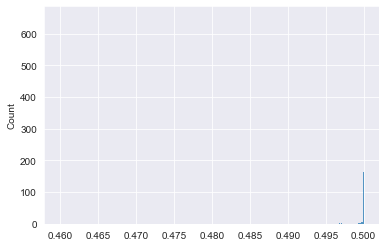

In [202]:
logit_est = LogisticRegression(random_state = 0,
                              max_iter = 10000, penalty = 'none')

model = logit_est.fit(X,sett)
print(model)
pr_sett = model_sett.predict_proba(X)[:,1]
np.mean(sett)
sns.set_style('darkgrid')
sns.histplot(pr_sett)

In [75]:
from sklearn.linear_model import LogisticRegression
# Hyperparameters - grid
# ==============================================================================
param_grid = {'model__penalty'  : ['l1', 'l2', 'elasticnet'],
              'model__C'     : [0.0001, 0.001, 0.01, 0.1, 1, 10, 20]
             }


logit_est = LogisticRegression(random_state = 0,
                              max_iter = 10000)

# Logit Model
LOGIT = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', logit_est)])


# Grid search by cross-validation
# ==============================================================================
grid = GridSearchCV(LOGIT,
        param_grid = param_grid,
        scoring    = 'f1_weighted',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

# Recover the best model
grid.fit(X, sett)
model_sett = grid.best_estimator_
pr_sett = model_sett.predict_proba(X)[:,1]

grid.fit(X, exp)
model_exp = grid.best_estimator_
pr_exp = model_exp.predict_proba(X)[:,1]

grid.fit(X, drp)
model_drp = grid.best_estimator_
pr_drp = model_drp.predict_proba(X)[:,1]


C:\Users\isaac\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.31753432        nan        nan 0.31753432        nan
        nan 0.31753432        nan        nan 0.31753432        nan
        nan 0.31753432        nan        nan 0.31753432        nan
        nan 0.31753432        nan]
  warnings.warn(
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan 0.31595083        nan        nan 0.31595083        nan
        nan 0.31595083        nan        nan 0.31595083        nan
        nan 0.31595083        nan        nan 0.31595083        nan
        nan 0.31595083        nan]
  warnings.warn(
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88632562        nan        nan 0.8859914         n

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'model__n_estimators': [150, 200],
              'model__max_features': [5, 7, 9],
              'model__max_depth'   : [None, 3, 10, 20]
             }



RFC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RandomForestClassifier(random_state=123))])


# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RFC,
        param_grid = param_grid,
        scoring    = 'f1_weighted',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

# Recover the best model
grid.fit(X, cr_win)
model_cr_win = grid.best_estimator_
pr_cr_win = model_cr_win.predict_proba(X)[:,1]

grid.fit(X, cr_los)
model_cr_los = grid.best_estimator_
pr_cr_los = model_cr_los.predict_proba(X)[:,1]

grid.fit(X_3, cr_win_ph2)
model_cr_win_ph2 = grid.best_estimator_
pr_cr_win_ph2 = model_cr_win_ph2.predict_proba(X_3)[:,1]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'model__n_estimators': [100, 200, 500],
              'model__max_features': ["auto", "sqrt", "log2"],
              'model__max_depth'   : [None, 3, 10, 20]
             }

# Random Forests
RFX = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RandomForestRegressor(random_state=123))])

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RFX,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 4,
        return_train_score = True
       )

# Recover the best model
grid.fit(X_1, tot_comp_1l)
model_tot_comp_1lrf = grid.best_estimator_
pr_tot_comp_1lrf = model_tot_comp_1lrf.predict(X_1)

In [15]:
grid.fit(X_2, dur_2l)
model_dur_2l = grid.best_estimator_
pr_dur_2l = model_dur_2l.predict(X_2)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'model__n_estimators'  : [500, 1000],
              'model__max_depth'     : [None, 1, 5, 10, 20],
              'model__subsample'     : [0.5, 1]
             }


GB  = GradientBoostingRegressor(
                        random_state        = 123,
                        # Activación de la parada temprana
                        validation_fraction = 0.1,
                        n_iter_no_change    = 5,
                        tol                 = 0.0001
                    )
# Gradient Boosting
GBX = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', GB)])


# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(GBX,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 4,
        return_train_score = True
       )

# Recover the best model
grid.fit(X_1, dur_1)
model_dur_1 = grid.best_estimator_
pr_dur_1 = model_dur_1.predict(X_1)

grid.fit(X_4, dur_4)
model_dur_4 = grid.best_estimator_
pr_dur_4 = model_dur_4.predict(X_4)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
Fitting 15 folds for each of 20 candidates, totalling 300 fits


In [18]:
from sklearn.linear_model import Ridge
from scipy.stats import uniform

param_distributions = {
    'modelo__alpha': uniform(0.001, 10)
}

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
RIDGEX = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])


# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = RIDGEX,
        param_distributions = param_distributions,
        n_iter     = 100,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),  
        verbose    = 4,
        random_state = 123,
        return_train_score = True
       )


grid.fit(X_31, dur_31)
model_dur_31 = grid.best_estimator_
pr_dur_31 = model_dur_31.predict(X_31)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [19]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

LRX = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LinearRegression())])

model_tot_comp_3l = LRX.fit(X_3, tot_comp_3l)
pr_tot_comp_3l = model_tot_comp_3l.predict(X_3)

model_tot_comp_3 = LRX.fit(X_3, tot_comp_3)
pr_tot_comp_3 = model_tot_comp_3.predict(X_3)

model_dur_30 = LRX.fit(X_30, dur_30)
pr_dur_30 = model_dur_30.predict(X_30)

model_tot_comp_1l = LRX.fit(X_1, tot_comp_1l)
pr_tot_comp_1l = model_tot_comp_1l.predict(X_1)



In [127]:
dict_models = {
    'm1' : [model_sett, X, sett, pr_sett],
    'm2' : [model_cr_los, X, cr_los, pr_cr_los],
    'm3' : [model_cr_win, X, cr_win, pr_cr_win],
    'm4' : [model_exp, X, exp, pr_exp],
    'm5' : [model_drp, X, drp, pr_drp],
    'm6' : [model_cr_win_ph2, X_3, cr_win_ph2, pr_cr_win_ph2],
    'm7' : [model_tot_comp_1lrf, X_1, tot_comp_1l, pr_tot_comp_1lrf],
    'm8' : [model_tot_comp_3l, X_3, tot_comp_3l, pr_tot_comp_3l],
    'm9' : [model_dur_1, X_1, dur_1, pr_dur_1],
    'm10' : [model_dur_30, X_30, dur_30, pr_dur_30],
    'm11' : [model_dur_31, X_31, dur_31, pr_dur_31],
    'm12' : [model_dur_4, X_4, dur_4, pr_dur_4],
    'm13' : [model_dur_2l, X_2, dur_2l, pr_dur_2l],    
    'm14' : [model_tot_comp_1l, X_1, tot_comp_1l, pr_tot_comp_1l],
    'm15' : [model_tot_comp_3, X_3, tot_comp_3, pr_tot_comp_3]
}

df_imp = pd.DataFrame()
df_pre = pd.DataFrame()

In [163]:

hola

'modo_termino'

,reclutamiento,giro_empresa_d2,giro_empresa_d3,giro_empresa_d4,giro_empresa_d5,giro_empresa_d6,giro_empresa_d7,giro_empresa_d8,giro_empresa_d9,giro_empresa_d10,...,min_indem,min_prima_antig,min_ag,min_vac,min_prima_vac,min_ley,c_sal_caidos,prop_hextra,hola,prm1
0,0.0,0,0,0,0,0,0,0,1,0,...,36095.398,12196.00000,3200.55000,2582.13990,645.530030,54719.621,152763.750,0.742337,True,0.499987
1,0.0,0,0,0,0,0,0,0,0,0,...,20999.699,400.48999,1016.42000,406.57001,101.640000,22924.820,86705.430,0.300202,False,0.499998
2,0.0,0,0,0,0,0,0,0,0,0,...,27900.000,322.19000,402.73999,161.10001,40.270000,28826.301,123101.000,0.251772,True,0.499987
3,0.0,0,0,0,0,0,0,0,0,0,...,19285.199,4968.31980,3038.08010,1542.81990,385.700010,29220.119,81876.391,0.000000,False,0.499987
4,0.0,0,0,0,0,0,0,0,0,0,...,12567.600,11277.77000,1587.73000,960.09003,240.020000,26633.211,52853.738,0.718268,True,0.499999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,0,0,0,0,0,0,0,0,0,...,274420.810,NaN,NaN,NaN,NaN,274420.810,2195976.300,0.262541,True,0.499680
4994,0.0,0,0,0,0,0,0,0,0,0,...,32400.000,711.94000,2677.81010,1077.04000,269.260010,37136.051,306036.000,0.000000,False,0.499943
4995,0.0,0,0,0,0,0,0,0,0,0,...,15428.570,354.00000,634.04999,253.62000,63.410000,16733.650,145731.440,0.000000,False,0.499975
4996,0.0,0,0,0,0,0,0,0,0,0,...,39198.602,5100.50980,4081.03000,233.88000,58.470001,48672.500,211498.220,0.000000,True,0.499987


In [165]:
for model in dict_models :
    prname = 'pr' + model
    prm = pd.DataFrame(dict_models[model][3])
    prm.rename(columns={0: prname}, inplace=True)
    tru = pd.DataFrame(dict_models[model][2])
    trname = 'true' + model
    tru.rename(columns={tru.columns[0]: trname}, inplace=True)
    frames = [dict_models[model][1], tru, prm]
    dfm = pd.concat(frames, axis=1)
    name = '/_aux/dfm_'+model+'.csv'
    dfm.to_csv(os.path.join(path + name) , index = False)

In [123]:
df1 = pd.DataFrame()

for column in X:
    if column in numeric_featuresX :
        reg = X[column]
    else :
        reg = X[column]
    result = sm.OLS(pr_sett, reg, missing='drop').fit()
    df = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
    df = df[['coef','std err']]
    name1 = 'coef_'+model
    name2 = 'std_'+model
    df.rename(columns={'coef': name1}, inplace=True)
    df.rename(columns={'std err': name2}, inplace=True)    
    print(df)

               coef_m15  std_m15
reclutamiento    0.4999    0.014
                 coef_m15  std_m15
giro_empresa_d2       0.5    0.353
                 coef_m15  std_m15
giro_empresa_d3       0.5    0.353
                 coef_m15  std_m15
giro_empresa_d4       0.5    0.138
                 coef_m15  std_m15
giro_empresa_d5       0.5    0.038
                 coef_m15  std_m15
giro_empresa_d6       0.5    0.118
                 coef_m15  std_m15
giro_empresa_d7       0.5    0.084
                 coef_m15  std_m15
giro_empresa_d8    0.4999     0.03
                 coef_m15  std_m15
giro_empresa_d9    0.4999    0.013
                  coef_m15  std_m15
giro_empresa_d10       0.5    0.046
                  coef_m15  std_m15
giro_empresa_d11       0.5    0.151
                  coef_m15  std_m15
giro_empresa_d12       0.5    0.087
                  coef_m15  std_m15
giro_empresa_d13    0.4999    0.032
                  coef_m15  std_m15
giro_empresa_d14    0.4999    0.065
              

In [124]:
result = sm.OLS(pr_sett, X, missing='drop').fit()
df = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
df = df[['coef','std err']]

In [125]:
df

,coef,std err
reclutamiento,2.200000e-03,2.000000e-03
giro_empresa_d2,2.727000e-01,2.800000e-02
giro_empresa_d3,-2.156000e-09,2.660000e-10
giro_empresa_d4,2.560000e-01,1.500000e-02
giro_empresa_d5,2.694000e-01,6.000000e-03
...,...,...
min_vac,6.600000e-03,1.080000e-01
min_prima_vac,1.606000e-01,1.960000e-01
min_ley,-3.740000e-02,8.300000e-02
c_sal_caidos,7.618000e-09,5.270000e-09


In [77]:
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

for model in dict_models :
    print(model)
    print('explained var:', explained_variance_score(dict_models[model][2], dict_models[model][3], multioutput='uniform_average'))
    print('r2:', r2_score(dict_models[model][2], dict_models[model][3], multioutput='variance_weighted'))
    cor = np.corrcoef(dict_models[model][2], dict_models[model][3])
    print('cor:',cor[0,1])
    fpr, tpr, thresholds = metrics.roc_curve(dict_models[model][2], dict_models[model][3], pos_label=1)
    print('auc:',metrics.auc(fpr, tpr))
    print('ps:',average_precision_score(dict_models[model][2], dict_models[model][3]))
    print('acc: ', accuracy_score(dict_models[model][2], np.round_(dict_models[model][3])))

m1
explained var: 7.409257209467501e-05
r2: -0.07719796058034611
cor: 0.027855221495016468
auc: 0.5219712493790363
ps: 0.6550518875816564
acc:  0.38755502200880354
m2
explained var: 0.8745975849757213
r2: 0.8742885093869285
cor: 0.9813857202847748
auc: 1.0
ps: 1.0
acc:  1.0
m3
explained var: 0.8585239644296353
r2: 0.8584675744371822
cor: 0.9887859549399923
auc: 1.0
ps: 0.9999999999999999
acc:  1.0
m4
explained var: 0.004142217757998612
r2: 0.004122896287365285
cor: 0.07099682931955163
auc: 0.6084433493913876
ps: 0.11830340679637487
acc:  0.9235694277711084
m5
explained var: -0.030205545165523873
r2: -0.06362183286581513
cor: 0.033189778765029355
auc: 0.5066846907237533
ps: 0.21820267933852355
acc:  0.7887154861944778
m6
explained var: 0.8683734653726811
r2: 0.8681383244206774
cor: 0.9819141303747493
auc: 1.0
ps: 1.0000000000000002
acc:  1.0
m7
explained var: 0.9052938236376566
r2: 0.9052156097576876
cor: 0.9712962657887343


ValueError: continuous format is not supported

In [126]:
for model in dict_models :
    importancia = permutation_importance(
                estimator    = dict_models[model][0],
                X            = dict_models[model][1],
                y            = dict_models[model][2],
                n_repeats    = 100,
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )
    # Var importance
    df_importancia = pd.DataFrame(
                        {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                     )
    name1 = 'imp_mean_'+model
    name2 = 'imp_std_'+model
    df_importancia.rename(columns={'importances_mean': name1}, inplace=True)
    df_importancia.rename(columns={'importances_std': name2}, inplace=True)
    df_imp = pd.concat([df_imp, df_importancia], axis=1)
    # BLP
    df1 = pd.DataFrame()
    Z = dict_models[model][1]
    for column in Z:
        if column in numeric_featuresX :
            reg = np.log(Z[column]+1)
        else :
            reg = Z[column]
        result = sm.OLS(np.log(dict_models[model][3]+1), reg, missing='drop').fit()
        df = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
        df = df[['coef','std err']]
        name1 = 'coef_'+model
        name2 = 'std_'+model
        df.rename(columns={'coef': name1}, inplace=True)
        df.rename(columns={'std err': name2}, inplace=True)    
        df1 = df1.append(df)
    df_pre =  pd.concat([df_pre, df1], axis=1)
    
df_imp['feature'] = X.columns    
df_pre['feature'] = X.columns  

C:\Users\isaac\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\isaac\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

In [ ]:
df_imp

In [ ]:
df_pre

In [ ]:
import os
df_pre_imp = pd.merge(df_pre, df_imp)
df_pre_imp.to_csv(os.path.join(path + '/_aux/df_pre_imp.csv') , index = False)

In [ ]:
df_pre_imp

In [33]:
dill.dump_session('ref_reports.db')